In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from tqdm import tqdm
from scipy import stats

In [2]:
class Ant:

    def __init__(self, pos=[0,0], length=10):
        x = pos[0]
        y = pos[1]
        self.init_position = np.asarray([x, y])
        self.position = np.asarray([x, y])
        self.directions = np.asarray([[0, 1],
                                      [0, -1],
                                      [1, 0],
                                      [-1,0]]) * length
        self.moves = 0

    def move(self):
        choice = random.randint(0, len(self.directions) - 1)
        self.position = self.position + self.directions[choice]
        self.moves += 1
        return self.position

def run_simulation(runs, func):

    moves = []

    for i in tqdm(range(runs)):
        a = Ant()
        found = False
        while not found:
            pos = a.move()
            found = func(pos)
        moves += [a.moves]

    return np.asarray(moves)

def plot_moves(moves):

    std = np.std(moves)
    mean = np.mean(moves)
    x = np.linspace(min(moves), max(moves), 1000)
    norm = stats.norm(loc=mean, scale=std)

    plt.hist(moves, max(moves))
    plt.plot(x, norm.pdf(x)*len(moves), label="Avg={}, STD={}".format(mean, std))
    plt.legend()
    plt.plot()

def found1(pos):
    x = pos[0]
    y = pos[1]
    if (x == 20) or (x == -20) or (y == 20) or (y == -20):
        return True
    else:
        return False 

def found2(pos):
    x = pos[0]
    y = pos[1]
    if (y >= -x + 10):
        return True
    else:
        return False 




In [3]:
moves = run_simulation(runs=1000000, func=found1)

100%|██████████| 1000000/1000000 [00:16<00:00, 59673.50it/s]


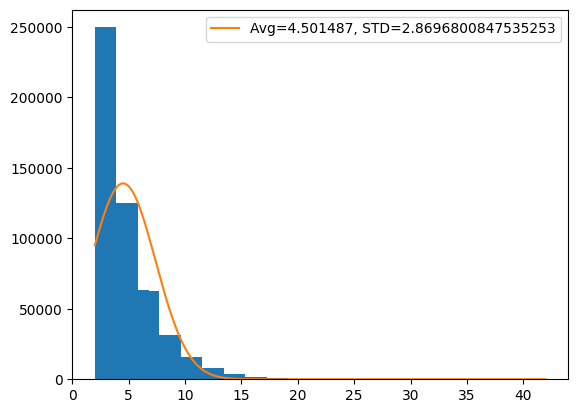

In [4]:
plot_moves(moves)

In [5]:
np.mean(moves)

4.501487

In [100]:
moves = run_simulation(runs=10000, func=found2)

100%|██████████| 10000/10000 [04:35<00:00, 36.35it/s]


In [105]:
np.mean(moves)

11934.7686

In [6]:
l = 3
p_matrix = np.zeros((l, l))
t_matrix = []

for i in range(l):
    for j in range(l):
        temp_matrix = p_matrix.copy()
        for x in [[i+1,j], [i-1,j], [i,j-1], [i,j+1]]:
            if (x[0] < 0) or (x[1] < 0) or (x[0] >= l) or (x[1] >= l):
                pass
            else:
                temp_matrix[x[0], x[1]] = 0.25
        temp_matrix = temp_matrix.flatten()
        if (j==0) or (i==0) or (j==l-1) or (i==l-1):
            temp_matrix = np.append(temp_matrix, [0.25], axis=0)
        else:
            temp_matrix = np.append(temp_matrix, [0], axis=0)
            
        t_matrix += [temp_matrix]


#state = [0, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 0, 0.25, 0, 0.25, 0, 0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0]
t_matrix = np.asarray(t_matrix)
t_matrix = np.append(t_matrix, np.asarray([[0,0,0,0,0,0,0,0,0,1]]), axis=0)
print(t_matrix)

[[0.   0.25 0.   0.25 0.   0.   0.   0.   0.   0.25]
 [0.25 0.   0.25 0.   0.25 0.   0.   0.   0.   0.25]
 [0.   0.25 0.   0.   0.   0.25 0.   0.   0.   0.25]
 [0.25 0.   0.   0.   0.25 0.   0.25 0.   0.   0.25]
 [0.   0.25 0.   0.25 0.   0.25 0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.   0.25 0.   0.   0.   0.25 0.25]
 [0.   0.   0.   0.25 0.   0.   0.   0.25 0.   0.25]
 [0.   0.   0.   0.   0.25 0.   0.25 0.   0.25 0.25]
 [0.   0.   0.   0.   0.   0.25 0.   0.25 0.   0.25]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


In [16]:
q_matrix = t_matrix.copy()[:-1, :-1]
print(q_matrix)
I = np.identity(9)

m_matrix = np.linalg.inv(I - q_matrix)

print(m_matrix)

[[0.   0.25 0.   0.25 0.   0.   0.   0.   0.  ]
 [0.25 0.   0.25 0.   0.25 0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.25 0.   0.   0.  ]
 [0.25 0.   0.   0.   0.25 0.   0.25 0.   0.  ]
 [0.   0.25 0.   0.25 0.   0.25 0.   0.25 0.  ]
 [0.   0.   0.25 0.   0.25 0.   0.   0.   0.25]
 [0.   0.   0.   0.25 0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.25 0.   0.25 0.   0.25]
 [0.   0.   0.   0.   0.   0.25 0.   0.25 0.  ]]
[[1.19642857 0.39285714 0.125      0.39285714 0.25       0.10714286
  0.125      0.10714286 0.05357143]
 [0.39285714 1.32142857 0.39285714 0.25       0.5        0.25
  0.10714286 0.17857143 0.10714286]
 [0.125      0.39285714 1.19642857 0.10714286 0.25       0.39285714
  0.05357143 0.10714286 0.125     ]
 [0.39285714 0.25       0.10714286 1.32142857 0.5        0.17857143
  0.39285714 0.25       0.10714286]
 [0.25       0.5        0.25       0.5        1.5        0.5
  0.25       0.5        0.25      ]
 [0.10714286 0.25       0.39285714 0.17857143 0.5        1.3

In [18]:
string = ""
for i in m_matrix:
    temp_str = np.array2string(i, separator=" & ", prefix="", suffix="", formatter={'float_kind':lambda x: "%.2f" % x})
    string += temp_str[1:-1] + " \\\ "
with open("matrix.txt", "w") as file:
    file.write(string)